<a href="https://colab.research.google.com/github/Dannexdandy/Dannexdandy/blob/main/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
#Preprocessing the graduation rate data
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Graduation rate.csv',encoding = 'unicode_escape', engine ='python')
graduationRate = df

In [ ]:
#Preprocessing average amount of student loan
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Average amount of student loans.csv',encoding = 'unicode_escape', engine ='python')
studentLoan = df
studentLoan[' Average student loan'] = studentLoan[' Average student loan'].str.replace('$', '')
studentLoan[' Average student loan'] = studentLoan[' Average student loan'].str.replace(',', '')
studentLoan[' Average student loan'] = studentLoan[' Average student loan'].astype(int)
studentLoan.dtypes

In [ ]:
#Preprocessing number of degree seeking undergraduates students
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Number of degree-seeking undergraduate students.csv',encoding = 'unicode_escape', engine ='python')
degreeSeeking = df
degreeSeeking[' Number of degree seeking undergraduates'] = degreeSeeking[' Number of degree seeking undergraduates'].str.replace(',', '')
degreeSeeking[' Number of degree seeking undergraduates'] = degreeSeeking[' Number of degree seeking undergraduates'].astype(int)
degreeSeeking

In [ ]:
#Combining the new data with the existing data
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Question4.csv',encoding = 'unicode_escape', engine ='python')
merged_df = pd.merge(df, graduationRate, on='State')
merged_df = pd.merge(merged_df,studentLoan, on='State')
merged_df = pd.merge(merged_df,degreeSeeking, on='State')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_columns = merged_df.columns[1:]
numerical_columns



data_for_scaling = merged_df[numerical_columns].astype(float)
#data_for_scaling

# Use MinMaxScaler to normalize the numerical columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_for_scaling)

# Create a new DataFrame with normalized values
df_normalized = pd.DataFrame(normalized_data, columns=numerical_columns)
#df_normalized

# Combine the 'State' column with the normalized values
df_normalized = pd.concat([df[['State']], df_normalized], axis=1)
#df_normalized

df_normalized['overall Ranking'] = df_normalized.sum(axis=1)
df_normalized

# Sort the DataFrame by the 'Total' column in descending order
df_normalized = df_normalized.sort_values(by='overall Ranking', ascending=False)
df_normalized

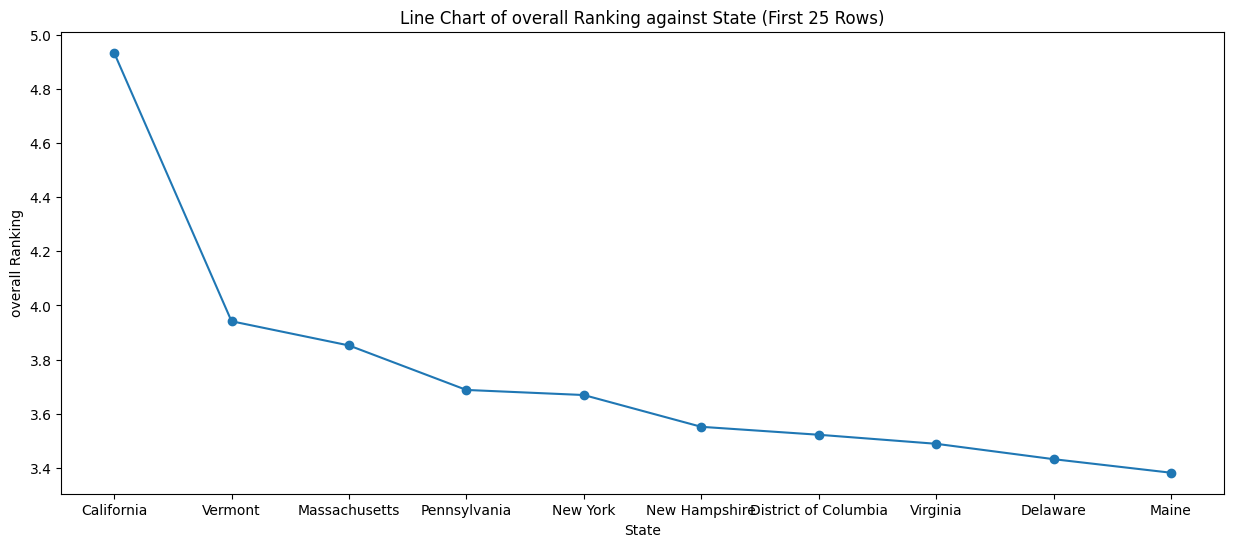

In [135]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x_column = 'State'
y_column = 'overall Ranking'

# Plot only the first 25 rows
subset_df = df_normalized.head(10)

plt.figure(figsize=(15, 6))  # Set the figure size

# Line chart for two numerical columns
plt.plot(subset_df[x_column], subset_df[y_column], marker='o')

# Customize the plot
plt.title(f'Line Chart of {y_column} against {x_column} (First 25 Rows)')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Show the plot
plt.show()



